# Diamonds price predcition 
* dataset source and specific dataset description **https://www.kaggle.com/shivam2503/diamonds**
* Explore the correlation between price and other factors by visualize the data
* use several frequent used method with scikit-learn to predict the diamonds price 

## Contents
1. [**Get Dataset and problems analysis**](#there_you_go_1)
2. [**Features and problem analysis**](#there_you_go_2)
3. [**Explore correlations between this features and price**](#there_you_go_3)
4. [**Feature Encoding**](#there_you_go_4)
5. [**Data preprocessing, split, scaling**](#there_you_go_5)
6. [**Select proper models**](#there_you_go_6)
7. [**Visualizing scores of models**](#there_you_go_7)

<a id="there_you_go_1"></a>
### 1. Get dataset and problems analysis

In [1]:
#get the dataset
import pandas as pd
import numpy as np

df = pd.read_csv('diamonds.csv', header=0 )
diamonds = df.copy()

#drop unnecessary columns
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [2]:
# How the data looks
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.axes

[RangeIndex(start=0, stop=53940, step=1),
 Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
        'z'],
       dtype='object')]

In [4]:
df.info()   #cut, color and clarity are categroical data as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
#check missing data
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Notice the minimum value of x, y, z shouldn't be zero.** 

In [7]:
#WARNINGN! the min of x, y, z are zero
#=> check how many rows might have problems
len(df.loc[(df['x']==0)|(df['y']==0)|(df['z']==0)])

20

In [8]:
#find the wrong data
df.loc[(df['x']==0)|(df['y']==0)|(df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [9]:
#drop on these rows
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [10]:
#Confirm
len(df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)])

0

<a id="there_you_go_2"></a>
### 2. Features and problem analysis

#### According to the description of the data set, There are several features can affect the price of diamonds.

![Anatomy](https://i.imgur.com/Bbf0GWk.jpg)
![Feathers](https://i.pinimg.com/originals/5d/ef/8a/5def8aad6b888834fb2f9b7c83630dfd.jpg)

#### Main features
* **Carat : ** Carat weight of the Diamond.
* **Cut : ** Describe cut quality of the diamond.
> * Quality in increasing order Fair, Good, Very Good, Premium, Ideal .
* **Color : ** Color of the Diamond.
> * With D being the best and J the worst.
* **Clarity : ** Diamond Clarity refers to the absence of the Inclusions and Blemishes.
> * (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

#### Other columns in datasets
* **Depth :** The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
* **Table :** The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
* **Price :** the Price of the Diamond.
* **X :** Length of the Diamond in mm.
* **Y :** Width of the Diamond in mm.
* **Z :** Height of the Diamond in mm.

##### Qualitative Features (Categorical) : Cut, Color, Clarity. 

##### Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z.

##### Price is the Target Variable.

<a id="there_you_go_3"></a>
### 3. Explore correlations between this features and price

In [11]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


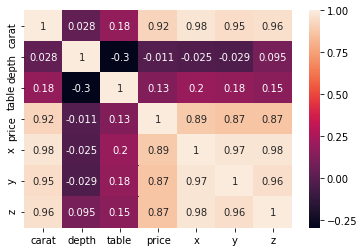

In [12]:
#visual the correlatoin
import seaborn as sns
sns.heatmap(data=df.corr(), cbar=True, annot=True)

In [41]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'volume'],
      dtype='object')

* **Notice that the 'cut', 'color', 'clarity' are categorical data, not shown here, they might affect the price deeply**

* No matter positive or negative correlation with price, the higher the absolute value is, the higher correlatoin represent

* From the table and heatmap, seems except 'table' and 'depth', other features do have strong correlatoin with price

#### 3.1 Carat

* **Carat refers to the Weight of the Stone, not the Size.**
* **The Weight of a Diamond has the most significant Impact on its Price.**
* **Since the larger a Stone is, the Rarer it is, one 2 Carat Diamond will be more Expensive than the Total cost of two 1 Carat Diamonds of the Same Quality. Thus, youn can see people brag about how heavy the diamoned is on their hands lol**
* **The carat of a Diamond is often very Important to People when shopping But it is a Mistake to Sacrifice too much quality for sheer size.**

In [14]:
# Visualize via kernal density estimation plots

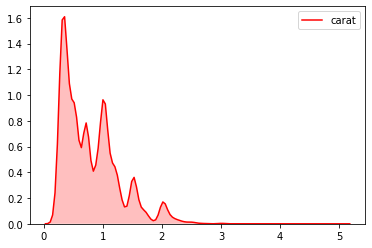

In [15]:
sns.kdeplot(df['carat'], shade=True , color='r')

#### Carat vs Price

/Users/timyang/Documents/Data_Analysis/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


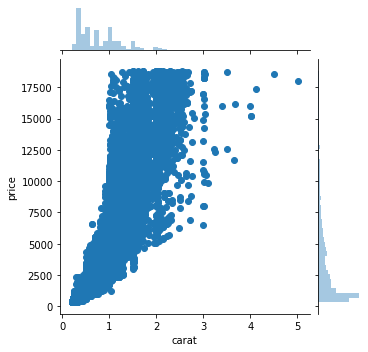

In [16]:
#jointplot 'carat' and 'price' and check the correlatoin
sns.jointplot(x='carat', y='price', data=df, kind='scatter', size=5)

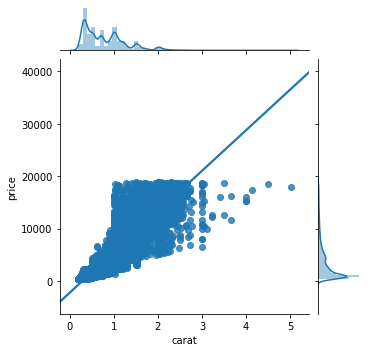

In [17]:
sns.jointplot(x='carat', y='price', data=df, kind='reg', size=5)  #plot as reg style

* **It seems that Carat have linear correlation with price.**

#### 3.2 Cut

* **Although the Carat Weight of a Diamond has the Strongest Effect on Prices, the Cut can still Drastically Increase or Decrease its value.**
* **With a Higher Cut Quality, the Diamond’s Cost per Carat Increases.**
* **This is because there is a Higher Wastage of the Rough Stone as more Material needs to be Removed in order to achieve better Proportions and Symmetry.**


/Users/timyang/Documents/Data_Analysis/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


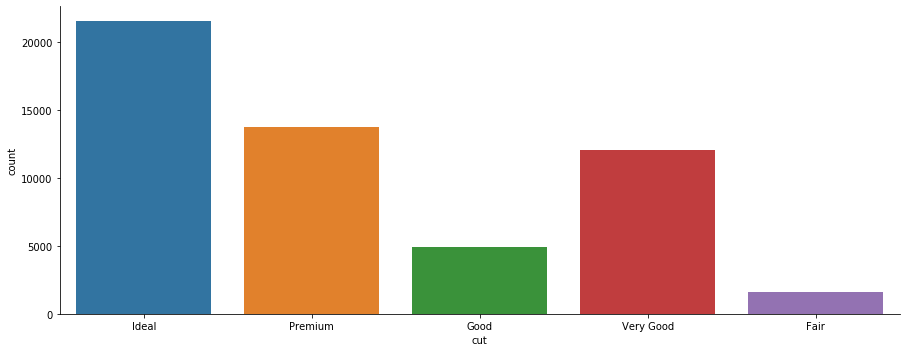

In [18]:
#check the number of different types of cut as the data are categorically recorded.
sns.factorplot(x='cut', data=df , kind='count',aspect=2.5 )

#### Cut vs Price

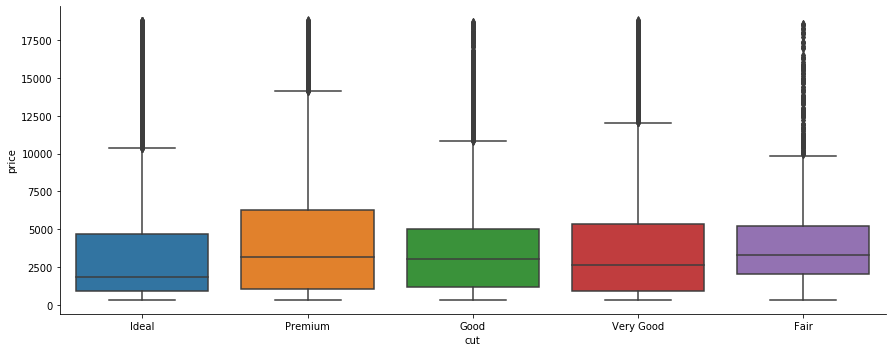

In [19]:
sns.factorplot(x='cut', y='price', data=df, kind='box' ,aspect=2.5 )

* **Premium Cut on Diamonds as we can see are the most Expensive, generally correspond to the rule of quality vs price**

#### 3.3 Color

* **The Color of a Diamond refers to the Tone and Saturation of Color, or the Depth of Color in a Diamond.**
* **The Color of a Diamond can Range from Colorless to a Yellow or a Faint Brownish Colored hue.**
* **Colorless Diamonds are Rarer and more Valuable because they appear Whiter and Brighter.**


![](https://beyond4cs.com/wp-content/uploads/2019/02/diamond-color-chart-with-example-diamonds-of-each-alphabet.jpg)

/Users/timyang/Documents/Data_Analysis/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


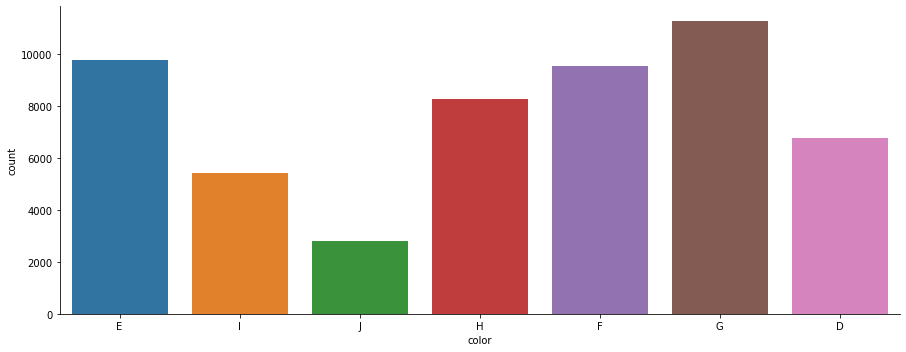

In [20]:
sns.factorplot(x='color', data=df , kind='count', aspect=2.5 )

#### Color vs Price

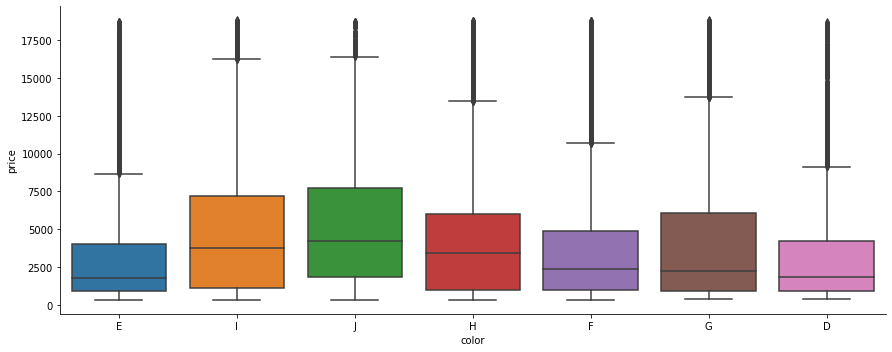

In [21]:
sns.factorplot(x='color', y='price' , data=df , kind='box', aspect=2.5)

* **G, I, J type are Nearly colorless, D should have high price in theroy but may also affect by other features, scuh as colorless but might clarity level is low**

#### 3.4 Clarity
* **Diamond Clarity refers to the absence of the Inclusions and Blemishes.**
* **An Inclusion is an Imperfection located within a Diamond. Inclusions can be Cracks or even Small Minerals or Crystals that have formed inside the Diamond.**
* **Blemishing is a result of utting and polishing process than the environmental conditions in which the diamond was formed. It includes scratches, extra facets etc.**



![](https://www.diamondbuying.org/wp-content/uploads/2018/02/diamond-clarity.png)

/Users/timyang/Documents/Data_Analysis/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


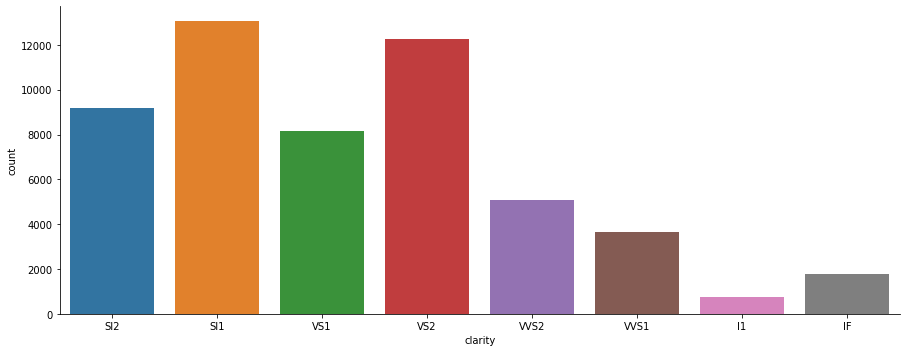

In [22]:
sns.factorplot(x='clarity', data=df, kind='count', aspect=2.5)

* **There are very few of IF level diamonds.**

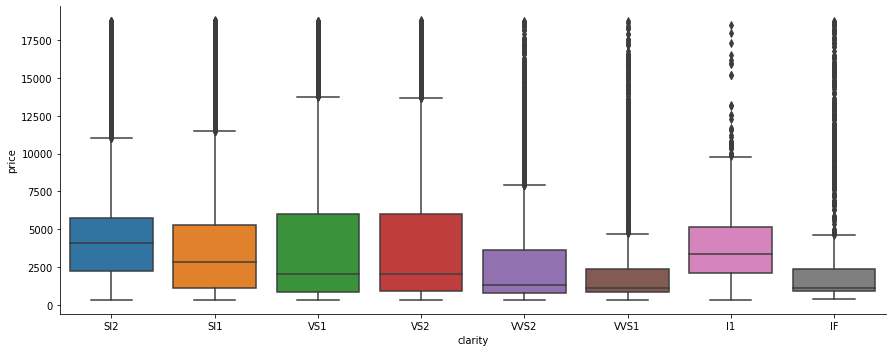

In [23]:
sns.factorplot('clarity','price',data=df, kind='box', aspect=2.5)

/Users/timyang/Documents/Data_Analysis/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


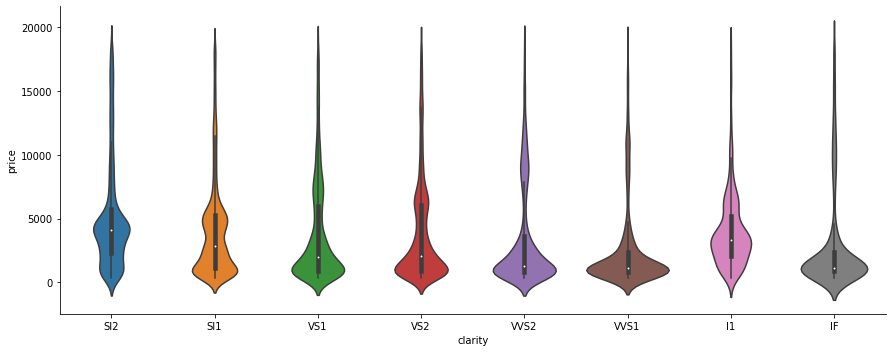

In [24]:
sns.factorplot('clarity', 'price', data=df, kind='violin', aspect=2.5)

* **It seems that VS1 and VS2 affect the Diamond's Price equally having quite high Price margin.**

#### 3.5 Depth
* **The Depth of a Diamond is its Height (in millimeters) measured from the Culet to the Table.**
* **If a Diamond's Depth Percentage is too large or small the Diamond will become Dark in appearance because it will no longer return an Attractive amount of light.**


![](https://ienzo.cafe24.com/edu/diamond/cut/diacut.jpg)

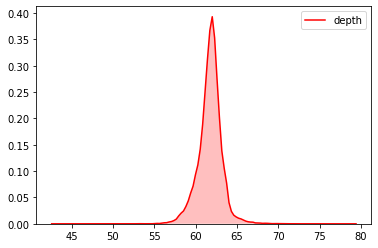

In [25]:
sns.kdeplot(df.depth, shade=True, color='r')

/Users/timyang/Documents/Data_Analysis/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


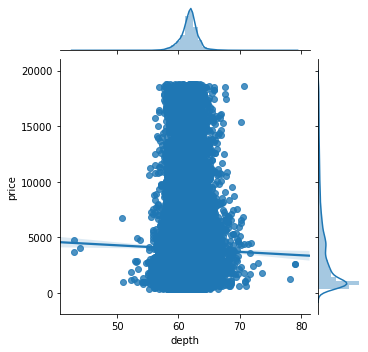

In [26]:
sns.jointplot(x='depth', y='price' , data=df , kind='reg', size=5)

* **The Price can vary heavily for the same Depth.**
* **And the Pearson's Correlation shows that there's a slightly inverse relation between the two.**

#### 3.6 Table
* **Table is the Width of the Diamond's Table expressed as a Percentage of its Average Diameter.**
* **If the Table (Upper Flat Facet) is too Large then light will not play off of any of the Crown's angles or facets and will not create the Sparkly Rainbow Colors.**
* **If it is too Small then the light will get Trapped and that Attention grabbing shaft of light will never come out but will “leak” from other places in the Diamond.**


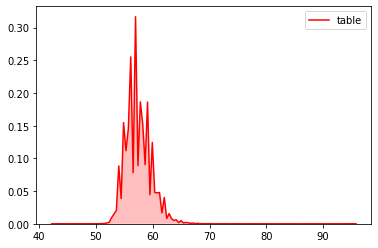

In [27]:
sns.kdeplot(df.table ,shade=True , color='r')

/Users/timyang/Documents/Data_Analysis/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


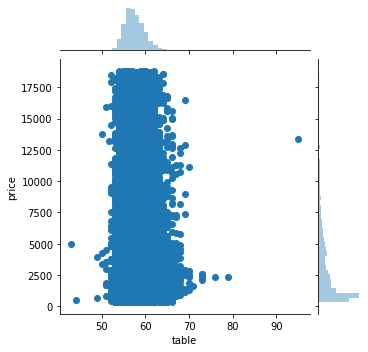

In [28]:
sns.jointplot(x='table', y='price', data=df , size=5)

* **Table shows the similar impact on price, the price can vary heavily for the same table size.**

#### 3.7 x, y, z 

* **As the Dimensions increases, Obviously the Prices Rises as more and more Natural Resources are Utilised.**

(2, 10)

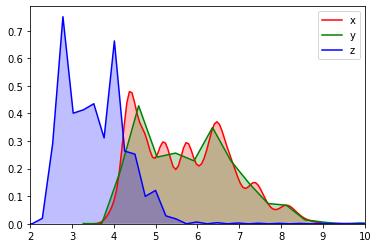

In [29]:
import matplotlib.pyplot as plt

sns.kdeplot(df.x ,shade=True , color='r' )
sns.kdeplot(df.y , shade=True , color='g' )
sns.kdeplot(df.z , shade= True , color='b')
plt.xlim(2,10)

#### 3.8 Create New Feature 'Volume' by combine related features x, y, z

In [30]:
df['volume'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


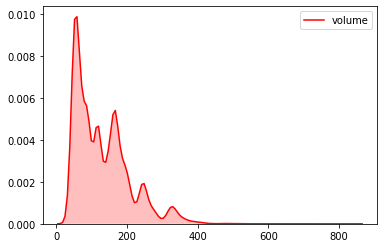

In [31]:
sns.kdeplot(df.volume, shade=True, color='r', clip=(0, 1000))

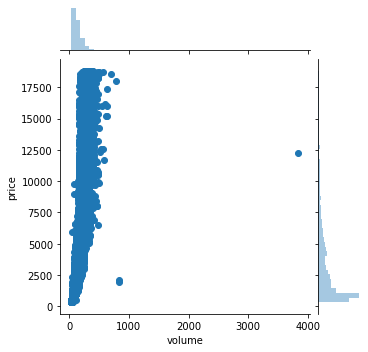

In [32]:
sns.jointplot(x='volume', y='price', data=df, kind='scatter', height=5)

* **It seems that there is linear relationship between price and volume (x \* y \* z).**

In [33]:
#df.drop(['x','y','z'], axis=1, inplace= True)
#df.head()

<a id="there_you_go_4"></a>
### 4. Feature Encoding

* **'cut', 'color', 'clarity' are categorical data, hard for models to create connection between price(numerical data)**
* **Label the Categorical Features with digits to Distinguish.**
* **As we can't feed String data for Modelling.**

In [34]:
#one hot encoding  VS label encoding

In [35]:
df2 = df.copy()

In [36]:
#feature encoding, convert categorical data into numerical represented data
from sklearn.preprocessing import LabelEncoder

label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


df2['cut'] = label_cut.fit_transform(df2['cut'])
df2['color'] = label_color.fit_transform(df2['color'])
df2['clarity'] = label_clarity.fit_transform(df2['clarity'])

In [37]:
#one hot encoding

df = pd.get_dummies(df)
df.head()

,carat,depth,table,price,x,y,z,volume,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,38.202030,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,34.505856,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,38.076885,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,46.724580,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,51.917250,0,1,...,0,1,0,0,0,1,0,0,0,0


In [38]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [39]:
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,51.917250


<a id="there_you_go_5"></a>
### 5. Data preprocessing, split, scaling

* **Split the dataset into train and test to fit models and predict on test.**
* **Then apply feature scaling to scaling into small number for better training.**

In [42]:
# Split the data into train and test.
from sklearn.model_selection import train_test_split

#target column is 'price'
X= df.drop(['price'], axis=1)
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [114]:
# Applying Feature Scaling ( StandardScaler )
# You can also Apply MinMaxScaler.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [115]:
len(df)

53920

In [116]:
df.shape

(53920, 28)

<a id="there_you_go_6"></a>
### 6. Select proper models

##### A fast way to find the proper model for your specific dataset
![](https://scikit-learn.org/stable/_static/ml_map.png)

* **From the cheat sheet, Regression might be the great method to handle our problem.**

In [148]:
# Collect all R2 Scores to compare resutls.
R2_Scores=[]

# Regression models 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.neural_network import MLPRegressor

models = ['Linear Regression', 'Lasso Regression', 'AdaBoost Regression', 'Ridge Regression', 'GradientBoosting Regression',
          'RandomForest Regression', 'KNeighbours Regression']

In [149]:
R2_Scores

[]

#### 6.1 Linear Regression

In [150]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.model_selection import cross_val_score

clf_lr = LinearRegression()
clf_lr.fit(x_train , y_train)

acc = cross_val_score(estimator = clf_lr, X = x_train, y = y_train, cv = 5, verbose = 1)

y_pred = clf_lr.predict(x_test)

print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(x_test, y_test))
print(acc)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



####### Linear Regression #######
Score : 0.9227
[0.91636377 0.91698732 0.84693686 0.92349575 0.91505434]

MSE    : 1212605.81 
MAE    : 727.48 
RMSE   : 1101.18 
R2     : 0.92 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


#### 6.2 Lasso Regression

In [151]:
clf_la = Lasso(normalize=True)
clf_la.fit(x_train , y_train)
accuracies = cross_val_score(estimator = clf_la, X = x_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_la.predict(x_test)

print('')
print('###### Lasso Regression ######')
print('Score : %.4f' % clf_la.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Lasso Regression ######
Score : 0.8745
[0.87640848 0.88307472 0.86303557 0.88470147 0.87768998]

MSE    : 1969760.42 
MAE    : 874.32 
RMSE   : 1403.48 
R2     : 0.87 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


#### 6.3 AdaBosst Regression

In [152]:
clf_ar = AdaBoostRegressor(n_estimators=100)

clf_ar.fit(x_train , y_train)

accuracies = cross_val_score(estimator = clf_ar, X = x_train, y = y_train, cv = 5,verbose = 1)

y_pred = clf_ar.predict(x_test)

print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   40.9s finished



###### AdaBoost Regression ######
Score : 0.8592
[0.84424862 0.85046002 0.8627057  0.8625744  0.85665276]

MSE    : 2210328.53 
MAE    : 1186.04 
RMSE   : 1486.72 
R2     : 0.86 


#### 6.4 Ridge Regression

In [154]:
#linear least regression with L2 regularization
clf_rr = Ridge(normalize=True)

clf_rr.fit(x_train , y_train)
accuracies = cross_val_score(estimator = clf_rr, X = x_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rr.predict(x_test)

print('')
print('###### Ridge Regression ######')
print('Score : %.4f' % clf_rr.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished



###### Ridge Regression ######
Score : 0.8242
[0.82504575 0.82251423 0.80854003 0.82939819 0.82390489]

MSE    : 2759752.75 
MAE    : 1051.87 
RMSE   : 1661.25 
R2     : 0.82 


#### 6.5 GradientBoosting Regression

In [155]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls',verbose = 1)

clf_gbr.fit(x_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = x_train, y = y_train, cv = 5, verbose = 1)

y_pred = clf_gbr.predict(x_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

      Iter       Train Loss   Remaining Time 
         1    14088664.5825            3.04s
         2    12494632.0694            2.76s
         3    11164162.6265            2.90s
         4     9975864.0733            2.86s
         5     9002457.5824            3.23s
         6     8119223.7955            3.45s
         7     7394642.9573            3.64s
         8     6761285.1562            3.55s
         9     6193616.0422            3.40s
        10     5721781.9257            3.26s
        20     3179433.0345            2.95s
        30     2365563.4825            2.70s
        40     2078826.4197            2.46s
        50     1921373.7675            2.07s
        60     1802514.8783            1.62s
        70     1712155.4849            1.18s
        80     1638786.5896            0.76s
        90     1576305.4437            0.37s
       100     1522598.6368            0.00s
      Iter       Train Loss   Remaining Time 
         1    14168263.3193            3.21s
        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


         6     8143255.5575            3.51s
         7     7410763.5575            3.59s
         8     6771737.9466            3.82s
         9     6201918.5925            3.78s
        10     5727237.6577            3.74s
        20     3163984.7876            3.55s
        30     2349379.2119            3.00s
        40     2062506.2634            2.55s
        50     1905986.0141            2.06s
        60     1787720.2220            1.59s
        70     1697728.3944            1.18s
        80     1624679.2852            0.79s
        90     1562931.5000            0.39s
       100     1509720.3360            0.00s
      Iter       Train Loss   Remaining Time 
         1    13963386.3910            5.42s
         2    12391081.1589            4.27s
         3    11065288.3214            3.93s
         4     9908654.0018            6.02s
         5     8937520.8710            6.98s
         6     8079752.3016            6.92s
         7     7351295.2205            7.65s
         

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.8s finished


#### 6.6 RandomForest Regression

In [156]:
clf_rf = RandomForestRegressor()

clf_rf.fit(x_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = x_train, y = y_train, cv = 5, verbose = 1)
y_pred = clf_rf.predict(x_test)

print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.3min finished



###### Random Forest ######
Score : 0.9819
[0.97987258 0.98198995 0.98166037 0.97943101 0.97742523]

MSE    : 283460.58 
MAE    : 264.08 
RMSE   : 532.41 
R2     : 0.98 


#### Tuning Parameters

In [157]:
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

no_of_test=[20]
params_dict={'n_estimators':no_of_test, 'n_jobs':[-1], 'max_features':["auto",'sqrt','log2']}

clf_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params_dict, scoring='r2')
clf_rf.fit(x_train,y_train)

print('Score : %.4f' % clf_rf.score(x_test, y_test))
pred=clf_rf.predict(x_test)

r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9815
R2     : 0.98 


#### 6.7 KNeighbours Regression

In [158]:
clf_knn = KNeighborsRegressor()

clf_knn.fit(x_train , y_train)

accuracies = cross_val_score(estimator = clf_knn, X = x_train, y = y_train, cv = 5, verbose = 1)
y_pred = clf_knn.predict(x_test)

print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

r2 = r2_score(y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.8s finished



###### KNeighbours Regression ######
Score : 0.9600
[0.95445867 0.95740749 0.95598505 0.95366439 0.95516223]

MSE    : 627298.13 
MAE    : 400.51 
RMSE   : 792.02 
R2     : 0.96 


#### Tuning Parameters

In [159]:
n_neighbors=[]
for i in range (0,20,5):
    if(i!=0):
        n_neighbors.append(i)
        
params_dict={'n_neighbors':n_neighbors, 'n_jobs':[-1]}
clf_knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=params_dict, scoring='r2')

clf_knn.fit(x_train,y_train)

print('Score : %.4f' % clf_knn.score(x_test, y_test))
pred=clf_knn.predict(x_test)

r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

Score : 0.9600
R2     : 0.96 


<a id="there_you_go_7"></a>
### 7. Visualizing scores of models

In [162]:
R2_Scores

[0.922743013123025,
 0.8745035252499387,
 0.8591765594541707,
 0.8241718949740705,
 0.9027373224248476,
 0.9814684986127936,
 0.960033868320378]

In [163]:
collection = {}
for m, s in zip(models, R2_Scores):
    collection[m]=s

In [164]:
collection   #with one-hot-encoding

{'Linear Regression': 0.922743013123025,
 'Lasso Regression': 0.8745035252499387,
 'AdaBoost Regression': 0.8591765594541707,
 'Ridge Regression': 0.8241718949740705,
 'GradientBoosting Regression': 0.9027373224248476,
 'RandomForest Regression': 0.9814684986127936,
 'KNeighbours Regression': 0.960033868320378}

In [240]:
collection    #with label encoding

{'Linear Regression': 0.8873453432268585,
 'Lasso Regression': 0.8658659296390635,
 'AdaBoost Regression': 0.8854605027542507,
 'Ridge Regression': 0.8100123308181558,
 'GradientBoosting Regression': 0.9082067272269927,
 'RandomForest Regression': 0.9820635835996191,
 'KNeighbours Regression': 0.9607299564130639}

* **it's better not use one-hot-encoding for random forest algorithm and adaboost algorithm.**
* **KNN and GradientBoosting performed similar in this case.**

In [165]:
compare = pd.DataFrame({'Models':models, 'Scores':R2_Scores})

In [166]:
compare = compare.sort_values(by='Scores', ascending=True)

In [171]:
compare

,Models,Scores
3,Ridge Regression,0.824172
2,AdaBoost Regression,0.859177
1,Lasso Regression,0.874504
4,GradientBoosting Regression,0.902737
0,Linear Regression,0.922743
6,KNeighbours Regression,0.960034
5,RandomForest Regression,0.981468


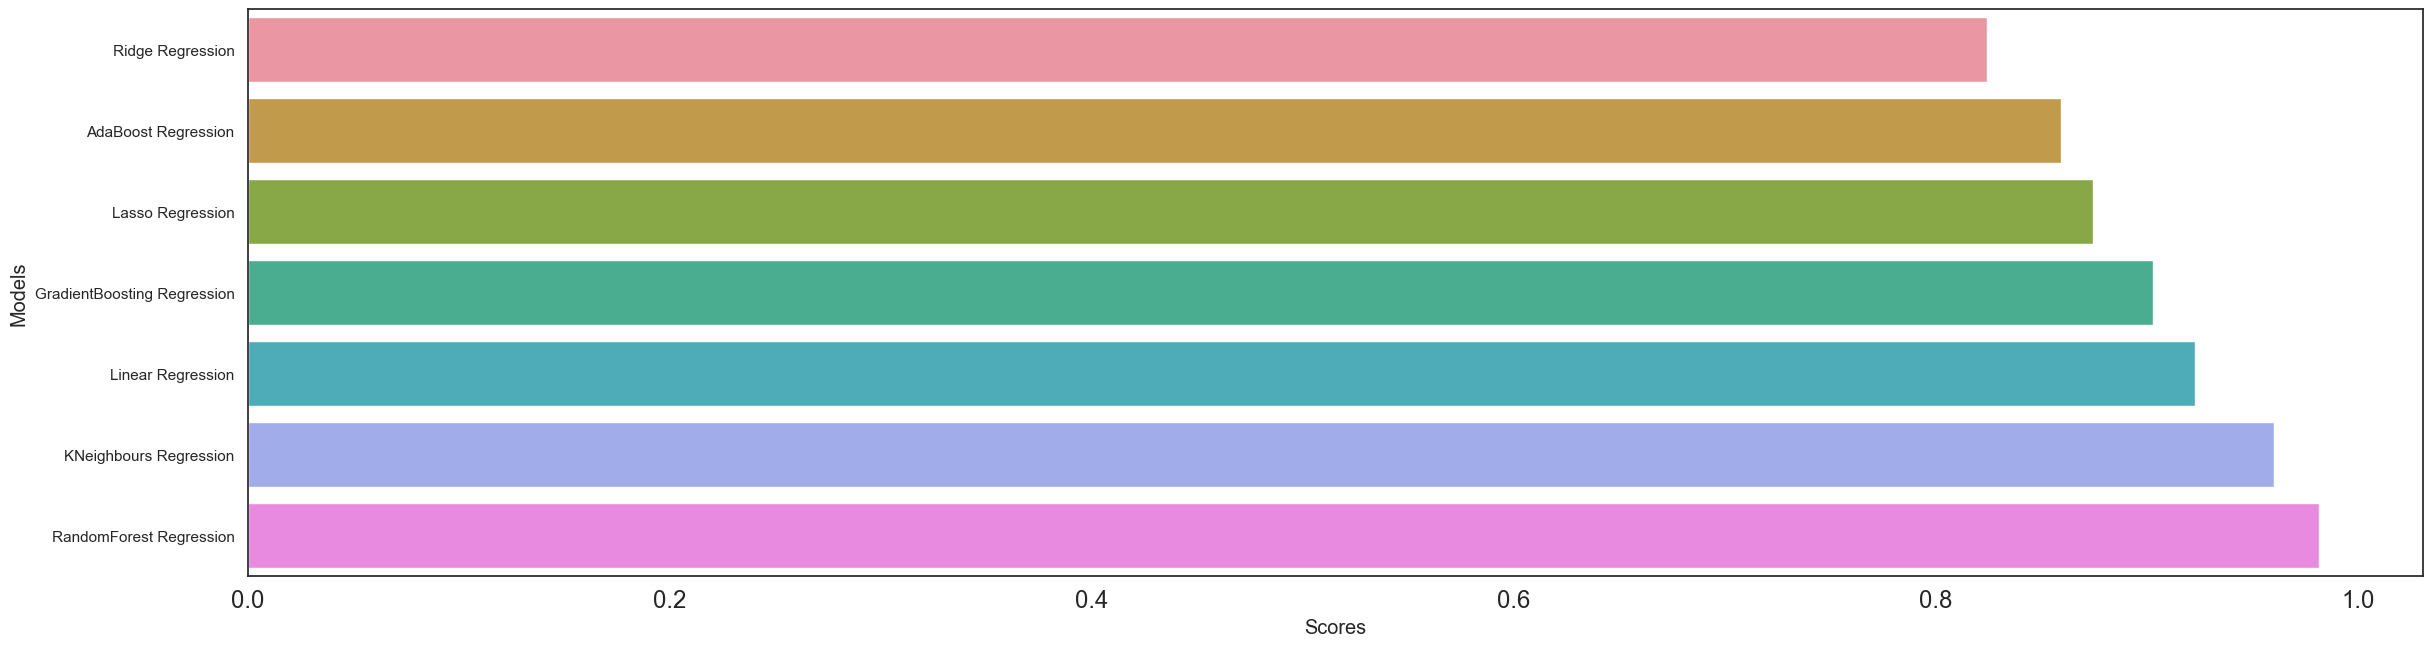

In [200]:
#visual the correlatoin
import seaborn as sns
sns.barplot(x='Scores' , y='Models' , data=compare )

/Users/timyang/Documents/Data_Analysis/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


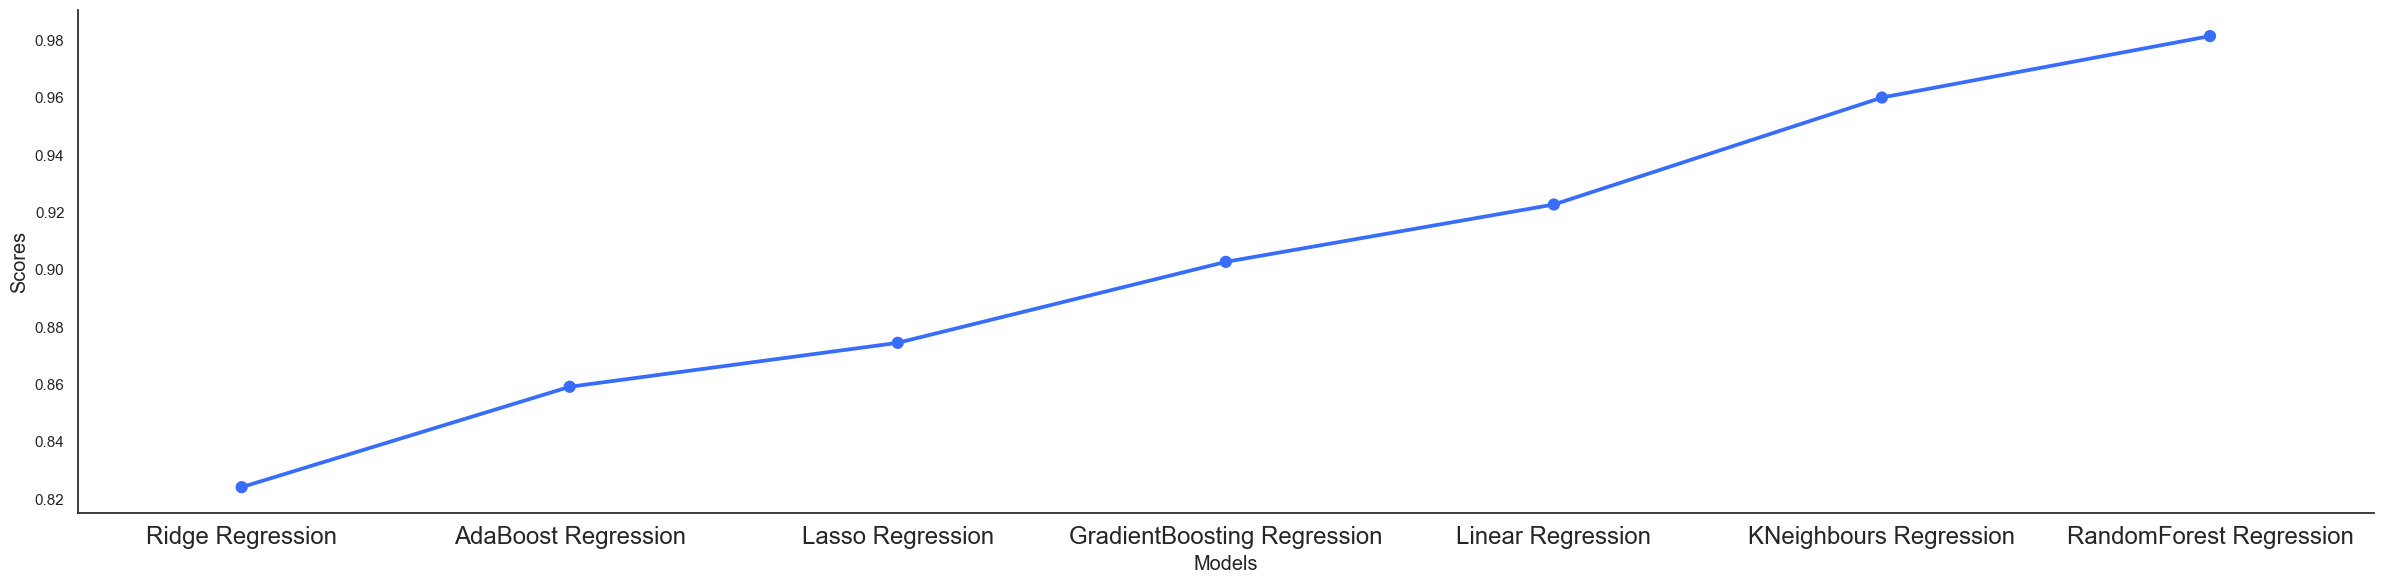

In [199]:
sns.factorplot(x='Models', y='Scores' , data=compare, height=6 , aspect=4)

* **Random Forest Regressor gives us the highest R2-Score [ 98% ].**

#### Libraries and models, metrics need for this task 

In [2]:
'''

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 



# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor




# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder



#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno



# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)


'''

'\n\n# Ignore warnings :\nimport warnings\nwarnings.filterwarnings(\'ignore\')\n\n\n# Handle table-like data and matrices :\nimport numpy as np\nimport pandas as pd\nimport math \n\n\n\n# Modelling Algorithms :\n\n# Classification\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.svm import SVC, LinearSVC\nfrom sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier\nfrom sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis\n\n# Regression\nfrom sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet\nfrom sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor \nfrom sklearn.svm import SVR\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.neural_network import MLPRegressor\n\n\n

In [198]:
# Configure visualisations
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')

sns.set(context="notebook", palette="rainbow", style = 'white' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 100,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)